<a href="https://colab.research.google.com/github/iranamira/metnum_pertemuan11_Namira-Nurfaliani/blob/main/metnum_pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Namira Nurfaliani - 21120122140135

Regresi

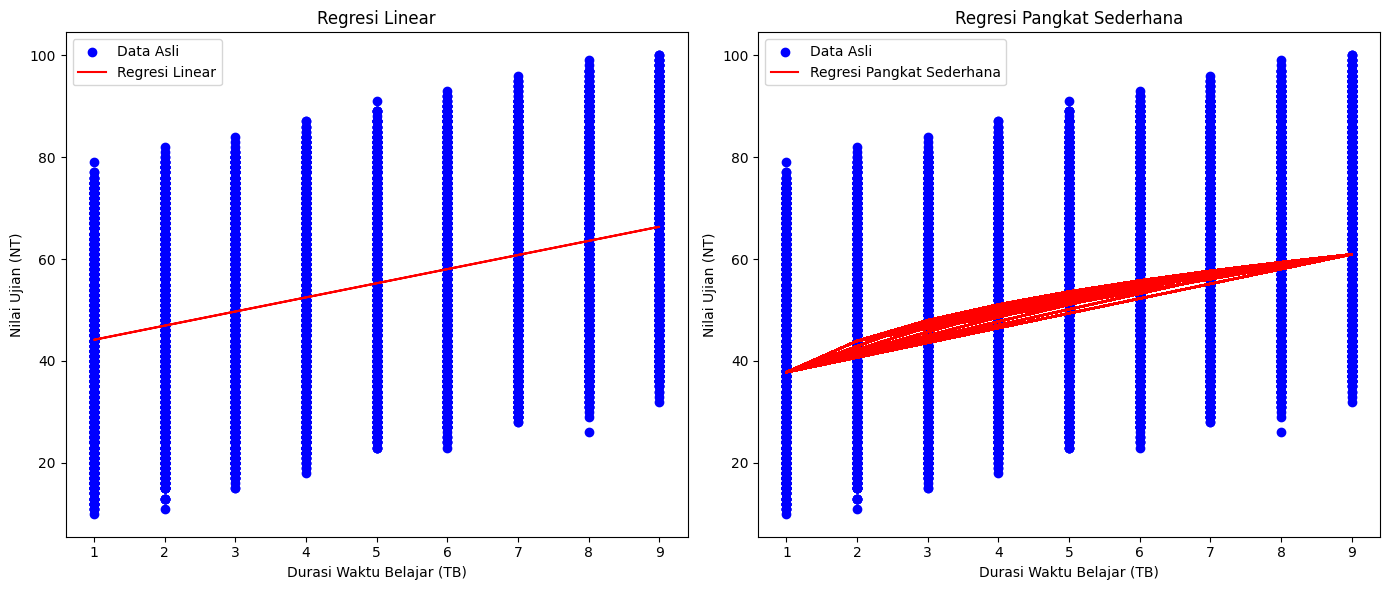

(17.819474832547773, 18.175837301582977)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impor data dari file CSV
file_path = 'Student_Performance.csv'  # ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Extract relevant columns
TB = data['Hours Studied'].values
NT = data['Performance Index'].values

# Reshape TB for sklearn
TB_reshaped = TB.reshape(-1, 1)

# Model Linear (Metode 1)
linear_model = LinearRegression()
linear_model.fit(TB_reshaped, NT)
NT_pred_linear = linear_model.predict(TB_reshaped)

# Model Pangkat Sederhana (Metode 2)
# y = a * x^b => log(y) = log(a) + b*log(x)
log_TB = np.log(TB)
log_NT = np.log(NT)
pangkat_model = LinearRegression()
pangkat_model.fit(log_TB.reshape(-1, 1), log_NT)
a = np.exp(pangkat_model.intercept_)
b = pangkat_model.coef_[0]
NT_pred_pangkat = a * (TB ** b)

# Plot data dan hasil regresi
plt.figure(figsize=(14, 6))

# Plot Model Linear
plt.subplot(1, 2, 1)
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()

# Plot Model Pangkat Sederhana
plt.subplot(1, 2, 2)
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_pangkat, color='red', label='Regresi Pangkat Sederhana')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Pangkat Sederhana')
plt.legend()

plt.tight_layout()
plt.show()

# Hitung galat RMS
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
rms_pangkat = np.sqrt(mean_squared_error(NT, NT_pred_pangkat))

rms_linear, rms_pangkat
